###  Estimating "Compressive Strength of Concrete" by "Nonlinear Regression"

Raw Data Resource:
https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls

##### Dataframe is composed of 9 scalar columns:
1. Cement (Kg/m3)
2. Blast Furnace Slag (aka BFS) (Kg/m3)
3. Fly Ash (Kg/m3)
4. Water  (Kg/m3) 
5. Super Plasticizer (aka SP) (Kg/m3)
6. Coarse Aggregate (Kg/m3)
7. Fine Aggregate (Kg.m3)
8. Age (days) 
9. Concrete Compressive Strength (aka Strength) (MPa) 
    
##### Purpose of Project:
Making an Estimator to predict the values of column 9:  **"Concrete Compressive Strength (MPa)"**


In [1]:
# importing necessary packages and modules

import re  # tet editing
import statistics as stat
import numpy  as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.decomposition import PCA

from sklearn.ensemble import IsolationForest

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPRegressor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor 
import random
from sklearn.utils import resample

from sklearn.decomposition import PCA
import matplotlib.colors as colors


In [2]:
# importing data

df_raw = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv',header=0) #, delimiter=';')
df_raw.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
# help
df_raw.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [4]:
# fixing columns header

df_raw.columns = [ 'age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT']
df_raw.head(3) 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1


In [5]:
# deleting unnecessary columns (eg. ID)

del_columns = [ ] 

keep_columns = []
for c in df_raw.columns:
    if c not in del_columns:
        keep_columns.append(c)
    
df_raw = df_raw.loc[ : , keep_columns ]
df_raw.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1


In [6]:
# reindexing
df_raw = df_raw.reindex(range(0,df_raw.shape[0]))

### Inspecting Columns
##### columns of dtype='object'  may contain:
 - 'whitespaces' in strings  
 - 'missing-values' which are usually shown by question-mark, '?'

In [7]:
# (auto) define a function called  find_obj_cols  which takes a dataframe
# and returns list of columns with  dtype=='object'

def find_obj_cols(df):
    cols = df.columns[ df.dtypes=='object' ]
    return cols

# (auto) object columns 
obj_cols = find_obj_cols( df_raw ); print('obj_cols',obj_cols)

obj_cols Index([], dtype='object')


In [9]:
# (input) help
obj_cols_index = []     # list( np.arange(0,1) )

# (auto)
for i in obj_cols_index:
    c = obj_cols[i]; print(' ', c, ' ', sorted(df_raw.loc[:,c].unique()))

In [10]:
# (input) indexes
white_index   = []
qmark_index   = []
int_o_index   = []
float_o_index = [0,1,2,3,4,5]
kama_index    = [0,1,2,3,4,5]

# (auto)
white_cols, qmark_cols, kama_cols, int_o, float_o, str_cols = [], [], [], [], [], []

for i in range(0,len(obj_cols)):
    c = obj_cols[i]
    if i in white_index: white_cols.append(c)
    if i in qmark_index: qmark_cols.append(c)
    if i in kama_index : kama_cols.append(c)
    if   i in int_o_index  : int_o.append(c)
    elif i in float_o_index: float_o.append(c)
    else                   : str_cols.append(c)

print('white_cols',white_cols); print('qmark_cols',qmark_cols); print('kama_cols',kama_cols); 
print('int_o',int_o); print('float_o',float_o); print('str_cols',str_cols);

white_cols []
qmark_cols []
kama_cols []
int_o []
float_o []
str_cols []


In [11]:
# (auto) define a function called  find_int_cols  which takes a dataframe
# and returns list of columns with  dtype=='int64'
def find_int_cols(df):
    cols = df.columns[ df.dtypes=='int64' ]
    return cols

# (auto) integer-columns mixed with float-columns 
int_i   = find_int_cols( df_raw );  print('int_i',int_i)
float_i = []; print('float_i',float_i)  # always empty

int_i Index(['anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
       'high_blood_pressure', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')
float_i []


In [15]:
# (auto) define a function called  find_float_cols  which takes a dataframe
# and returns list of columns with  dtype=='float64'
def find_float_cols(df):
    cols = df.columns[ df.dtypes=='float64' ]
    return cols

# (auto) float-columns mixed with integer-columns
float_cols_dirty = find_float_cols( df_raw ); print('float_cols_dirty',float_cols_dirty)

float_cols_dirty Index(['age', 'platelets', 'serum_creatinine'], dtype='object')


In [22]:
# (input) help
float_cols_dirty_index = []     # list( np.arange(0,1) )

# (auto)
for i in float_cols_dirty_index:
    c = float_cols_dirty[i]; print(' ', c, ' ', np.round( sorted(df_raw.loc[:,c].unique()),2))

In [23]:
# (input) index of int-columns wrongfully in float_cols_dirty
int_index = [ 0 ]

# (auto)
int_f = []
for i in int_index:
    c = float_cols_dirty[i]
    int_f.append(c)
     
float_f = []
for c in float_cols_dirty:
    if c not in int_f:
        float_f.append( c )
        
print('int_f',int_f); print('\nfloat_f',float_f)

int_f ['age']

float_f ['platelets', 'serum_creatinine']


In [24]:
# (auto) int_cols & float_cols 

int_cols   = list(int_o)   + list(int_i)   + list(int_f);   print('int_cols',int_cols)
float_cols = list(float_o) + list(float_i) + list(float_f); print('\nfloat_cols',float_cols)

int_cols ['anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT', 'age']

float_cols ['platelets', 'serum_creatinine']


### Fixing *'whitespaces'* in *dtype='object'* columns

In [29]:
# (auto)
df_dirty = df_raw.copy()

# define a function called fix_whitespaces
# to remove whitespaces from begining/end of strings

def fix_whitespaces( df, cols ):
    n = df.shape[0]
    for c in cols:
        s=[]
        for i in range(0,n):
            s.append( df.loc[i,c].strip() )
        df.loc[:,c] = s
    return df

# removing
df_no_white = fix_whitespaces( df_dirty, white_cols )
    
# Checking 
'''
for c in obj_cols:
    print('\n', c, '\n', sorted(df_no_white.loc[:,c].unique()))
'''
df_no_white.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1


### Converting **,** => **.**
eg 0**,**12  =>  0**.**12

In [31]:
# (input)
df_dirty = df_no_white.copy()

# (auto) define function convert_comma_to_dot
def convert_comma_to_dot( df, ft ):
    x = df[ ft ].copy()
    n = len( x ) 
    for i in range(0,n): 
        x[i] = x[i].replace( "," , "." ) 
    return x

# (auto) converting   ,  =>  .
for c in kama_cols: df_dirty.loc[:,c]=convert_comma_to_dot(df_dirty,c)
df_no_comma = df_dirty.copy()    
df_no_comma.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1


### Fixing '?' in *dtype='object'* columns
 - in numeric columns,  '?' => "median" of numbers
 - in string columns, '?' => "mode" of strings

In [32]:
# (input)
df_dirty = df_no_comma.copy() 

# (auto) define a function called fix_qmarks
# which returns corrected df[ft]

def fix_qmarks( df, ft, str_cols, num_cols ):
    
    x = df[ft].copy()
    n = df.shape[0]
    
    if ft in str_cols:   
        typ = 'str' 
    else:  
        typ = 'num' 
               
    val=[]
    for r in range(0,n):
        if (  (x[r])=='?'  ):
            ;
        else:
            val.append( x[r] )
    
    if (  typ=='str'  ):
        val = np.array(val).astype('str')
        ave = stat.mode(val)  
    elif (  typ=='num'  ):
        val = np.array(val).astype('float64')
        ave = stat.median(val)
    else:
        print("typ is neither  'str'  nor  'int'  nor  'float'")
        return df[ft]
    
    for r in range(0,n):
        if (  x[r]=='?'  ):
            x[r]=ave
    
    print(ft,typ)
    
    if   (  typ=='str'  ):
        return x.astype('str') 
    else:
        return x.astype('float64')

# fixing columns
for ft in qmark_cols: 
    df_dirty.loc[:,ft] = fix_qmarks( df_dirty, ft, str_cols, int_cols+float_cols )

df_no_qmark = df_dirty.copy()
print( df_no_qmark.head() )

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

### Fixing *'blank cells'* in all columns (auto)

In [33]:
# (input) 
df_dirty = df_no_qmark.copy() 

# (auto) Boolean function
# True: feature has blank_cells
def has_blank(df,ft): 
    x = df[ft].count()
    n = df.shape[0] 
    return x<n

# (auto) finding blank_cols
blank_cols=[]
for c in df_dirty.columns:
    if has_blank( df_dirty, c ):
        blank_cols.append( c ) 

print(blank_cols) 

[]


#####   

In [36]:
# (auto) fixing blank-cols

# define a function called fix_blank
# which returns corrected df[ft]

def fix_blank( df, ft, str_cols, int_cols, float_cols ):
    
    x = df[ft].copy()
    n = df.shape[0]
    
    if ft in str_cols:   
        typ='str'
    elif ft in int_cols: 
        typ = 'int'
    elif ft in float_cols: 
        typ = 'float'
    else:   
        print('\nWarning!\n ', ft, ' is neither in  str_cols  nor in  int_cols  nor in  float_cols')
        return x
        
    val=[]
    for r in range(0,n):
        if (  pd.notnull(x[r])==True  ): 
            val.append( x[r] )
    
    if (  typ=='str'  ):
        val = np.array(val).astype('str')
        ave = stat.mode(val) 
    elif (  typ=='int'  ):
        val = np.array(val).astype('int')
        ave = stat.median(val)
    elif (  typ=='float'  ):
        val = np.array(val).astype('float')
        ave = stat.median(val)
    else:
        print("typ is neither  'str'  nor  'int'  nor  'float'")
        return df[ft]
    
    for r in range(0,n):
        if (  pd.isnull(x[r])==True  ):  
            x[r]=ave
    
    if   (  typ=='str'  ):  
        return x.astype('str')
    elif (  typ=='int'  ):  
        return x.astype('int64')                 
    else:
        return x.astype('float64')

# fixing columns
for ft in blank_cols: 
    df_dirty.loc[:,ft]=fix_blank( df_dirty, ft, str_cols, int_cols, float_cols )

df_no_blank = df_dirty.copy()
df_no_blank.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1


### df_no_missing

In [37]:
# (input) df_no_missing
df_no_missing = df_no_blank.copy()

#####   
### fixing dtype of columns

In [38]:
# (auto)
df = df_no_missing.copy()
for c in int_cols:   df[c]=df[c].astype(int)
for c in float_cols: df[c]=df[c].astype(float)
for c in str_cols:   df[c]=df[c].astype(str)
df_no_missing = df.copy()

### Dividing columns into 'Scalar' and 'Categorical'
The ordinal columns with less than 5 unique values are 'Categorical'. 
The ordinal columns with 5 and more unique values are 'Scalar'.

In [39]:
# Guide
'''                                         *
   dtype            n_uniques               *
                n<=4         n>=5           *              ordinal     non-ordinal
                                            *                       
   object    categorical   categorical      *       XXX:   scalar      categorical
   float       scalar        scalar         *
    int      categorical      XXX           *
                                            *    
''' 
# (auto) help
df_no_missing.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [41]:
# estimated column
estimated_column = 'age'

# (auto) correction to optimize classification
df_no_missing[estimated_column] = df_no_missing[estimated_column].astype(float)

In [42]:
# (auto) sc & cat
df = df_no_missing

cat, sc, xxx = [], [], []
for c in df.columns: 
    if   df[c].dtype=='object' : cat.append(c)
    elif df[c].dtype=='float64': sc.append(c)
    elif len(df[c].unique())<=4: cat.append(c)
    else                       : xxx.append(c)  
        
print('cat',cat); print('\nsc',sc); print('\nxxx',xxx)      

cat ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

sc ['age', 'platelets', 'serum_creatinine']

xxx ['creatinine_phosphokinase', 'ejection_fraction', 'serum_sodium', 'time']


In [44]:
# help
indexes = [ 2,3] 
for i in indexes:
    c = xxx[i] 
    print( ' ', i,'  #', len(df_no_missing[c].unique()), ' ', sorted(df_no_missing[c].unique()) )

  2   # 27   [113, 116, 121, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 148]
  3   # 148   [4, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 20, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 35, 38, 40, 41, 42, 43, 44, 45, 50, 54, 55, 59, 60, 61, 63, 64, 65, 66, 67, 68, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 82, 83, 85, 86, 87, 88, 90, 91, 94, 95, 96, 97, 100, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 117, 118, 119, 120, 121, 123, 126, 129, 130, 134, 135, 140, 145, 146, 147, 148, 150, 154, 162, 170, 171, 172, 174, 175, 180, 185, 186, 187, 188, 192, 193, 194, 195, 196, 197, 198, 200, 201, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 220, 230, 231, 233, 235, 237, 240, 241, 244, 245, 246, 247, 250, 256, 257, 258, 270, 271, 278, 280, 285]


In [45]:
# (input)
xxx_non_ordinal_index = [ ]

# (auto)
non_ordinal_columns,  ordinal_columns  =  [], []
for i in range(0,len(xxx)):
    if i in xxx_non_ordinal_index: non_ordinal_columns.append( xxx[i] )
    else:                              ordinal_columns.append( xxx[i] )

In [46]:
# (auto)
scalar_columns     = list(sc)  + list(ordinal_columns);     print(' scalar_columns',scalar_columns)
categorical_columns= list(cat) + list(non_ordinal_columns); print('\ncategorical_columns',categorical_columns)

 scalar_columns ['age', 'platelets', 'serum_creatinine', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_sodium', 'time']

categorical_columns ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']


In [47]:
# (auto) sorting order of columns:  scalar first, categorical second  
df_no_missing = df_no_missing.loc[ :, scalar_columns+categorical_columns ]

# (auto) converting all categorical columns to str
for c in categorical_columns:
    df_no_missing.loc[:,c] = df_no_missing.loc[:,c].astype(str) 
    
df_no_missing.head(2)

,age,platelets,serum_creatinine,creatinine_phosphokinase,ejection_fraction,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,75.0,265000.00,1.9,582,20,130,4,0,0,1,1,0,1
1,55.0,263358.03,1.1,7861,38,136,6,0,0,0,1,0,1


#####   

### Data Cleaning
Typically there is some noise (dirt) in the data which should be cleaned.

##### There are two approaches to clean the data:
1. Statistical Methods, including:
 - Inter Quartile Range (IQR): to detect general univariate outliers
 - z-values: to detect extreme univariate outliers
 - mahalanobis distance test: to detect multivariate outliers


2. Machine-Learning Methods, including:
 - Isolation Forest 
 - Eliptic_envelope
 - Local Outlier Factor
 - One Class SVM 
 

In [48]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
#                                                         #
#                  Visualizing Outliers                   #
#                        by Boxplot                       # 
#                                                         #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

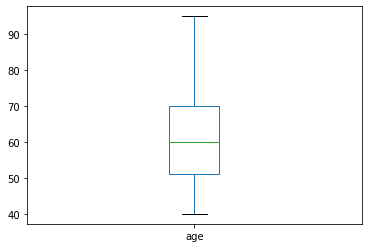

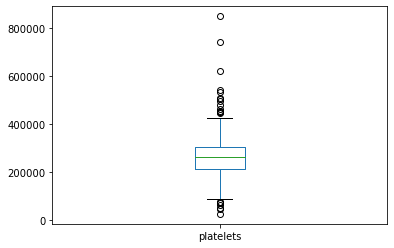

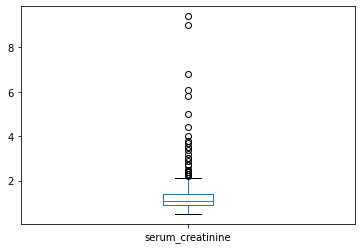

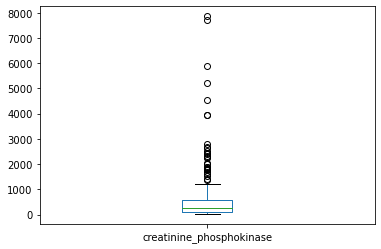

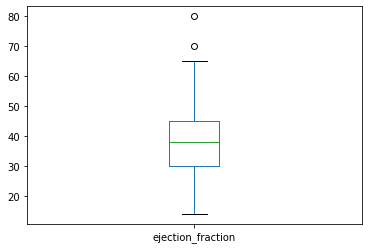

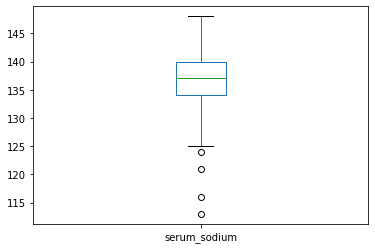

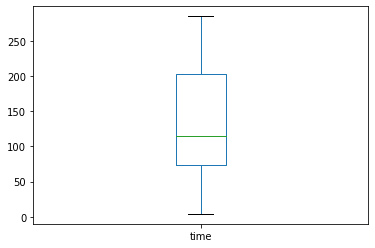

In [49]:
# define a function called "plot_boxplot"

def plot_boxplot(df,ft):   
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()    
    
for c in scalar_columns:
    plot_boxplot( df_no_missing, c )

In [50]:
# help
print( scalar_columns )

['age', 'platelets', 'serum_creatinine', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_sodium', 'time']


In [51]:
# defining columns with outliers
outlier_cols = [ 'platelets', 'serum_creatinine', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_sodium' ] 

In [52]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
#                                                         #
#                Fixing "Extreme" Outliers                # 
#                     using "z-values"                    #
#                                                         #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

In [53]:
# Option (1) Winsorizing Extreme Outliers

# df_dirty
df_dirty = df_no_missing.copy()

# define a function called winsorize
# which converts extreme outliers to threshhold
# and returns list of winsorized indexes
# z = (x-M) / SD
# +/- 3    

def winsorize(df,ft):
    x  = df[ft].copy()
    M  = x.mean()
    SD = x.std()
    z  = (x-M) / SD
    
    upper_bound = +3
    lower_bound = -3
    
    ls = df.index[  (z > upper_bound) 
                  | (z < lower_bound) ]
    
    x_Des=sorted(x,reverse=True)
    i=0
    while x_Des[i] >=  M + 3*SD:
        i=i+1 
    MAX=x_Des[i] 
    
    x_Asc=sorted(x,reverse=False)
    i=0 
    while x_Asc[i] <=  M - 3*SD:
        i=i+1  
    MIN=x_Asc[i] 
    
    for i in range(0,len(x)):
        if   z[i] > upper_bound: x[i]=MAX
        elif z[i] < lower_bound: x[i]=MIN
            
    return [x, ls]


# create a function to store the output indices 
# from multiple columns

df_no_extreme = df_dirty.copy()
 
index_list = []
for c in outlier_cols:
    c_clean, ls = winsorize( df_dirty, c )
    index_list.extend( ls )
    df_no_extreme.loc[ :, c ] = c_clean

df_extreme = df_no_missing.iloc[ sorted(index_list), : ] 
print( len(df_no_extreme)/len(df_raw) *100 )
df_no_extreme.head(3)

100.0


,age,platelets,serum_creatinine,creatinine_phosphokinase,ejection_fraction,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,75.0,265000.00,1.9,582,20,130,4,0,0,1,1,0,1
1,55.0,263358.03,1.1,2794,38,136,6,0,0,0,1,0,1
2,65.0,162000.00,1.3,146,20,129,7,0,0,0,1,1,1


#####   

In [ ]:
# Option (2) Removing Extreme Outliers
'''
# df_dirty
df_dirty = df_no_missing.copy()

# define a function called outliers
# which returns a list of index of outliers
# z = (x-M) / SD
# +/- 3    

def outliers(df,ft):
    x  = df[ft]
    M  = x.mean()
    SD = x.std()
    z  = (x-M) / SD
    
    upper_bound = +3
    lower_bound = -3
    
    ls = df.index[  (z > upper_bound) 
                  | (z < lower_bound) ]
    
    return ls



# create a function to store the output indices 
# from multiple columns    
    
index_list = []
for feature in outlier_cols:  
    index_list.extend( outliers(df_dirty,feature) )

# define a function called "remove_extreme_outliers_by_zValues"
# which returns a dataframe without extreme outliers 

def remove_extreme_outliers_by_zValues(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df 

df_extreme    = df_dirty.iloc[ sorted(index_list), : ]
df_no_extreme = remove_extreme_outliers_by_zValues( df_dirty, index_list )
len(df_no_extreme)/len(df_raw) *100

'''  

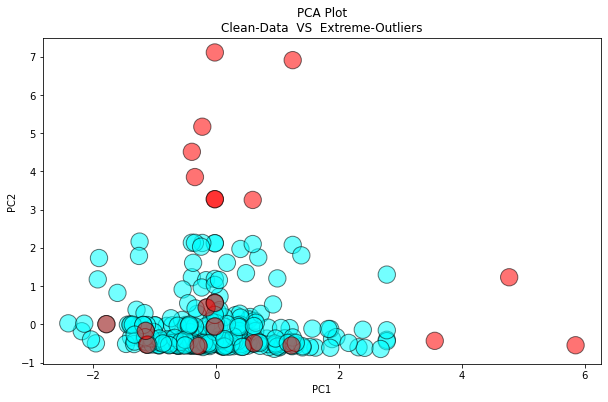

In [54]:
# visualizing extreme outliers
df_dirty = pd.concat([df_no_extreme[scalar_columns],df_extreme[scalar_columns]],axis=0)

flag_clean   = np.ones( df_no_extreme.shape[0] ) * (+1)
flag_outlier = np.ones( df_extreme.shape[0]    ) * (-1) 

flag = list(flag_clean)
for i in list(flag_outlier):
    flag.append(i)

# PCA
x = df_dirty 
y = []
for i in range(0,len(flag)):
    if flag[i]==1: y.append('cyan')
    else:          y.append('red')

pca = PCA()
pca.fit_transform( x )
 
x_pca = scale( pca.fit_transform( x ) )
x_pc1 = x_pca[:,0] 
x_pc2 = x_pca[:,1] 

# PCA Scatter Plot 
fig, ax = plt.subplots( figsize=(10,6) )  

scatter = ax.scatter( 
      x_pc1
    , x_pc2 
    #, cmap = 'rainbow'
    , c    = y
    , s    = 300
    , edgecolors = 'k'
    , alpha      = 0.55 
    )
 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA Plot\nClean-Data  VS  Extreme-Outliers') 

plt.show()

In [55]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
#                                                         #
#            Removing "Multivariate" Outliers             # 
#              using "Mahalanobis Distance"               #
#                                                         #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

In [56]:
# df_dirty
#df_dirty = df_no_missing.copy()
df_dirty = df_no_extreme.copy()

# define a function called "MahalanobisDist"
# which returns the Mahalanobis Distance (MD) for each record

def MahalanobisDist(df, verbose=False):
    covariance_matrix = np.cov(df, rowvar=False)
    if is_pos_def(covariance_matrix):
        inv_covariance_matrix = np.linalg.inv(covariance_matrix)
        if is_pos_def(inv_covariance_matrix):
            vars_mean = []
            for i in range(df.shape[0]):
                vars_mean.append(list(df.mean(axis=0)))
            diff = df - vars_mean
            md = []
            for i in range(len(diff)):
                md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i])))

            if verbose:
                print("Covariance Matrix:\n {}\n".format(covariance_matrix))
                print("Inverse of Covariance Matrix:\n {}\n".format(inv_covariance_matrix))
                print("Variables Mean Vector:\n {}\n".format(vars_mean))
                print("Variables - Variables Mean Vector:\n {}\n".format(diff))
                print("Mahalanobis Distance:\n {}\n".format(md))
            return md
        else:
            print("Error: Inverse of Covariance Matrix is not positive definite!")
    else:
        print("Error: Covariance Matrix is not positive definite!")

def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False

# finding mahalanobis distance for each record
md = MahalanobisDist(df_dirty[scalar_columns].to_numpy(), verbose=0)


# defining a function called "multivar_outliers" 
# which returns list of indexes of multivariate outliers 

def multivar_outliers(df,md):
    #df['MD'] = md
    M  = np.mean(md)
    SD = np.std(md)
    threshhold = M + 3.0*SD
    ls = df.index[  (md > threshhold)  ]
    return ls
 
index_list = multivar_outliers( df_dirty[scalar_columns], md )


# define a function called "remove"
# which removes multivariate outliers

def remove_multivar_outliers(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df 

df_no_multivar = remove_multivar_outliers( df_dirty, index_list ) 
df_multivar    = df_dirty.drop( df_no_multivar.index ) 
len(df_no_multivar)/len(df_raw) *100

99.33110367892976

#####   

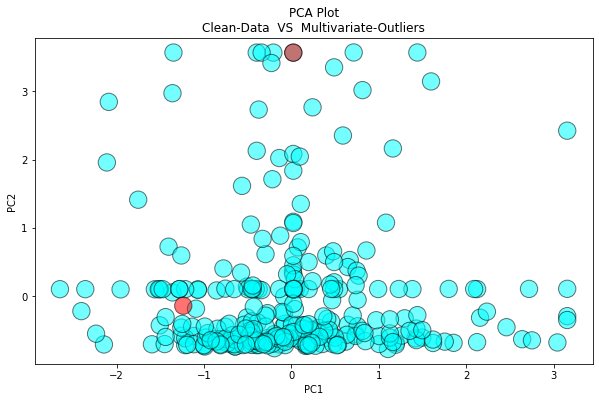

In [57]:
# visualizing multivariate outliers
df_dirty = pd.concat([df_no_multivar[scalar_columns],df_multivar[scalar_columns]],axis=0)

flag_clean   = np.ones( df_no_multivar.shape[0] ) * (+1)
flag_outlier = np.ones( df_multivar.shape[0]    ) * (-1) 

flag = list(flag_clean)
for i in list(flag_outlier):
    flag.append(i)

# PCA
x = df_dirty 
y = []
for i in range(0,len(flag)):
    if flag[i]==1: y.append('cyan')
    else:          y.append('red')

pca = PCA()
pca.fit_transform( x )
 
x_pca = scale( pca.fit_transform( x ) )
x_pc1 = x_pca[:,0] 
x_pc2 = x_pca[:,1] 

# PCA Scatter Plot 
# Clean VS Multivar
fig, ax = plt.subplots( figsize=(10,6) )  

scatter = ax.scatter( 
      x_pc1
    , x_pc2 
    #, cmap = 'rainbow'
    , c    = y
    , s    = 300
    , edgecolors = 'k'
    , alpha      = 0.55 
    )
 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA Plot\nClean-Data  VS  Multivariate-Outliers') 

plt.show()

In [58]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
#                                                         #
#       Cleaning scalar data using Isolation-Forest       # 
#                                                         #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

In [63]:
#df_dirty = df_no_missing.copy()
#df_dirty = df_no_extreme.copy()
df_dirty = df_no_multivar.copy()


# define a function called Clean_by_IForest
# to clean 'scalar columns' using 'Isolation Forest'

def remove_outliers_by_IForest( df, sc_cols, c ):
    sc_data = df[ sc_cols ].values
    IForest = IsolationForest( contamination=c ) 
    IForest.fit( sc_data )
    flag_clean = IForest.predict( sc_data ) == +1
    return df.loc[ flag_clean, : ]

df_no_noise = remove_outliers_by_IForest( df_dirty, scalar_columns, 0.04 )   # 4% contamination considered
df_noise = df_dirty.drop( df_no_noise.index )   

len(df_no_noise)/len(df_raw) *100

95.31772575250837

#####   

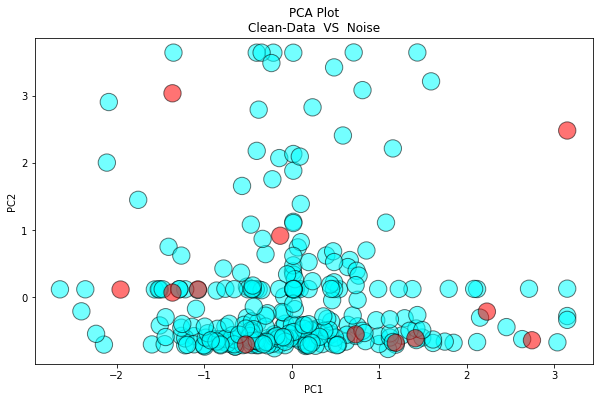

In [64]:
# visualizing noise
df_dirty = pd.concat([df_no_noise[scalar_columns],df_noise[scalar_columns]],axis=0)

flag_clean   = np.ones( df_no_noise.shape[0] ) * (+1)
flag_outlier = np.ones( df_noise.shape[0] ) * (-1) 

flag = list(flag_clean)
for i in list(flag_outlier):
    flag.append(i)

# PCA  
x = df_dirty 
y = []
for i in range(0,len(flag)):
    if flag[i]==1: y.append('cyan')
    else:          y.append('red')

pca = PCA()
pca.fit_transform( x )
 
x_pca = scale( pca.fit_transform( x ) )
x_pc1 = x_pca[:,0] 
x_pc2 = x_pca[:,1] 

# PCA Scatter Plot 
# Clean VS Multivar
fig, ax = plt.subplots( figsize=(10,6) )  

scatter = ax.scatter( 
      x_pc1
    , x_pc2 
    #, cmap = 'rainbow'
    , c    = y
    , s    = 300
    , edgecolors = 'k'
    , alpha      = 0.55 
    )
 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA Plot\nClean-Data  VS  Noise') 

plt.show()

#####   

In [65]:
# Checking Cleaned data at each stage
 
# Outliers    
Outlier_Dict = { 
      'Method'       : [  'z-values'
                        , 'Mahalanobis_Distance'
                        , 'Isolation Forest']
    
    , 'Outlier_Type' : [  'Extreme' 
                        , 'Multivariate'        
                        , 'Noise'           ]
    
    , 'Clean'        : [  len(df_no_extreme)
                        , len(df_no_multivar)
                        , len(df_no_noise) ]
    
    , 'Outlier'      : [  len(df_extreme)
                        , len(df_multivar)
                        , len(df_noise) ]
    
    , 'Clean/No_Missing (%)' : [  len(df_no_extreme)/len(df_no_missing)  *100
                                , len(df_no_multivar)/len(df_no_missing) *100
                                , len(df_no_noise)/len(df_no_missing)    *100 ] }

Outlier = pd.DataFrame( Outlier_Dict ) 
Outlier

,Method,Outlier_Type,Clean,Outlier,Clean/No_Missing (%)
0,z-values,Extreme,299,20,100.000000
1,Mahalanobis_Distance,Multivariate,297,2,99.331104
2,Isolation Forest,Noise,285,12,95.317726


### df_clean

In [66]:
# (input)
df_clean = df_no_noise.copy()
df_clean.head( 3 )

,age,platelets,serum_creatinine,creatinine_phosphokinase,ejection_fraction,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,75.0,265000.00,1.9,582,20,130,4,0,0,1,1,0,1
1,55.0,263358.03,1.1,2794,38,136,6,0,0,0,1,0,1
2,65.0,162000.00,1.3,146,20,129,7,0,0,0,1,1,1


In [67]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
#                                                         #
#                Inspecting the Scalar data               # 
#                                                         #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

In [68]:
# Checking Normality of Distribution of "Estimated Feature"
# by Shapiro-Wilk Test
 
from scipy.stats import shapiro

print('\nShapiro-Wilk Test ...')
stat, p = shapiro( df_clean[ estimated_column ] )

if p>.5: 
    Dist='Normally Distributed.'        # Distribution
    Reg='Linear Regression'             # Regression
else:   
    Dist='NOT Normally Distributed.'    # Distribution
    Reg='Nonlinear Regression'          # Regression
        
print( '\np =', p, 
       '\n=> "' + estimated_column + '" is', Dist, 
       '\n=>  ' + Reg, 'should be used.\n' )
           


Shapiro-Wilk Test ...

p = 0.00020880115334875882 
=> "age" is NOT Normally Distributed. 
=>  Nonlinear Regression should be used.



C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


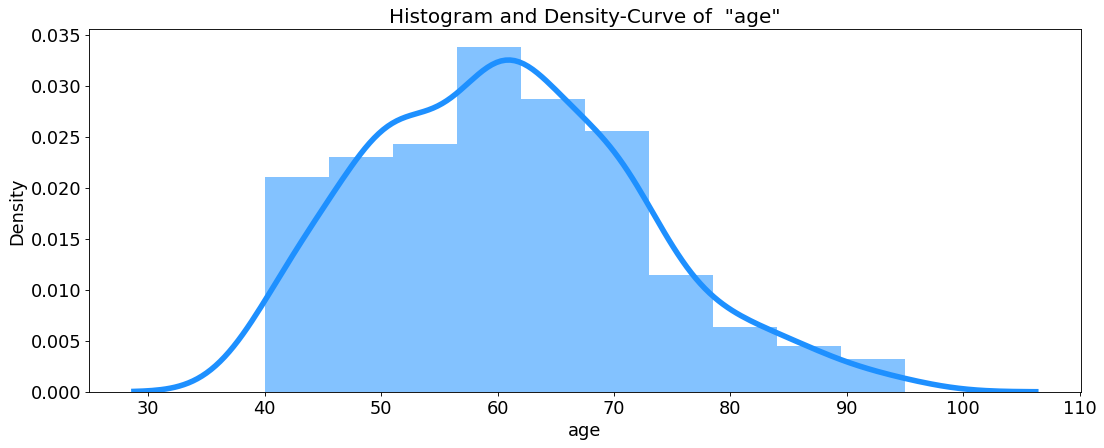

In [69]:
# Histogram & Density Curve
# of Predicted Feature 

import seaborn as sns 

# plot
plt.figure(figsize=(16,6), dpi=80) 
sns.distplot(
        df_clean.loc[ :, estimated_column ]
        , color    =  'dodgerblue' 
        , hist_kws = {'alpha':.55}
        , kde_kws  = {'linewidth':5}
        ) 
 
# Decoration
plt.title('Histogram and Density-Curve of  "' + estimated_column + '"', fontsize=18) 
plt.xlabel( estimated_column,   fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16) 
plt.show() 

## Linearity Assumption
There must be a linear relationship between estimated feature with other scalar features. To Check Linearity, two tools are used:
- Scatter Plot
- Pearson's r Test
    
### Scatter Plots
 - Plotted data must be elliptical. 
 - if the plotted data is curved or cone-shape, nonlinear regression should be used.

### Pearson's r Test
 - result must be significant (P<=.05) 
 - the relationship parameter, r, shouls be notable. Best r is from 0.50 to 1.00
 

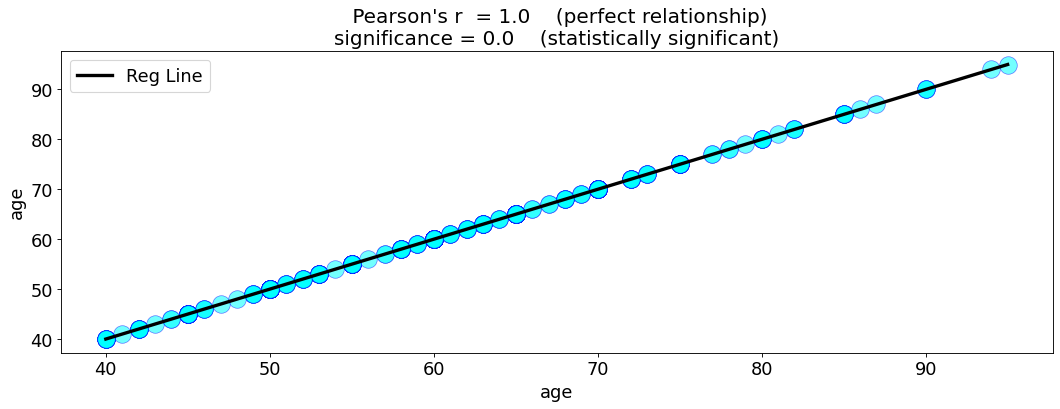

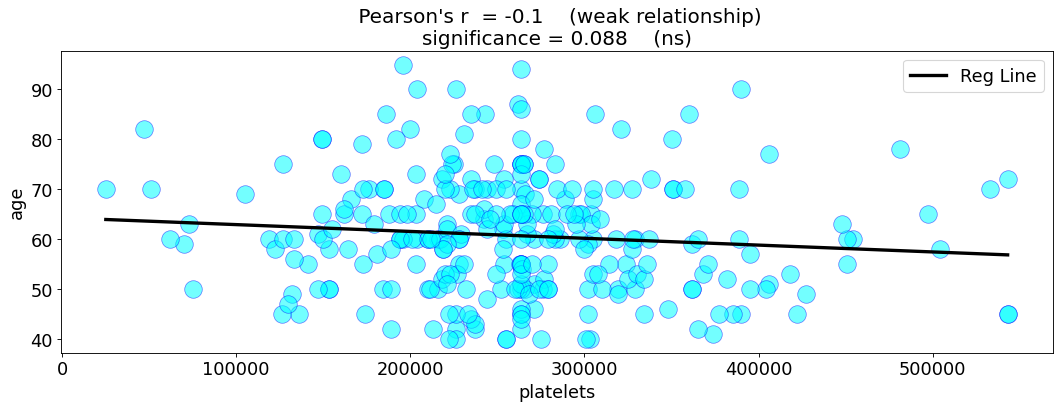

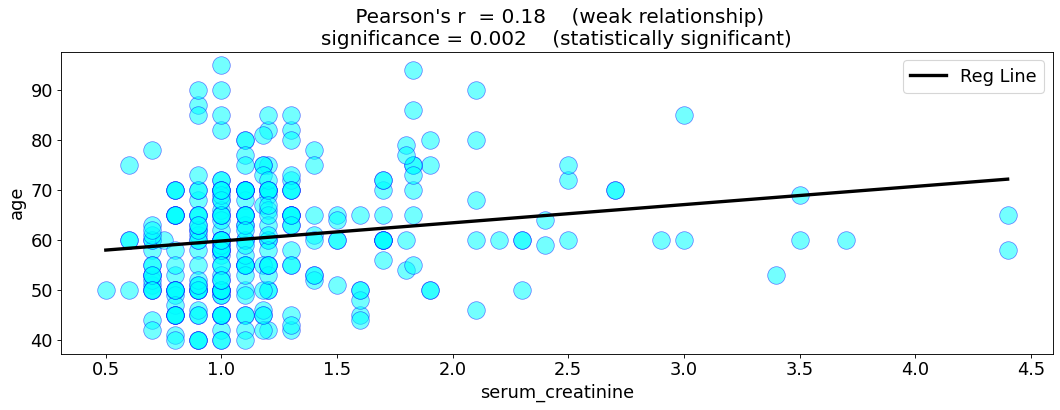

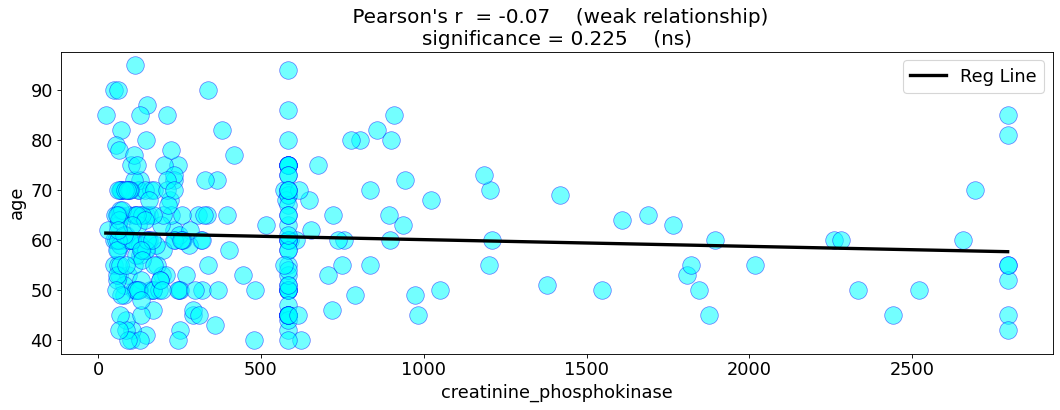

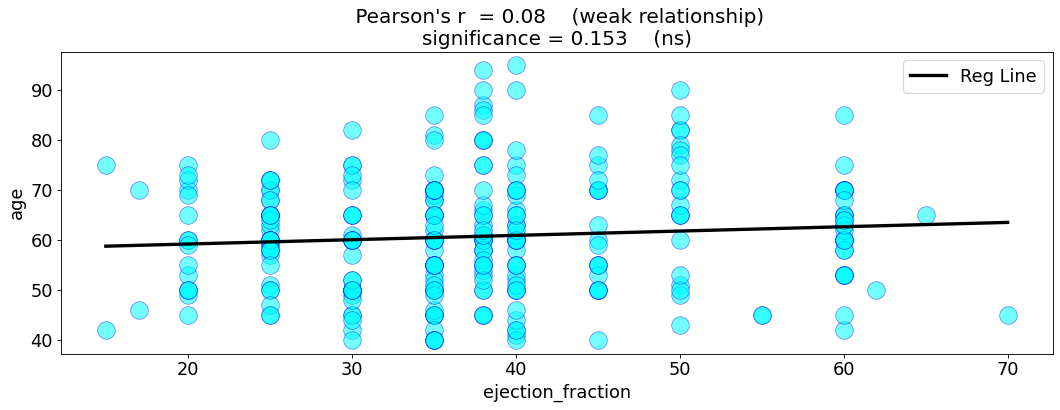

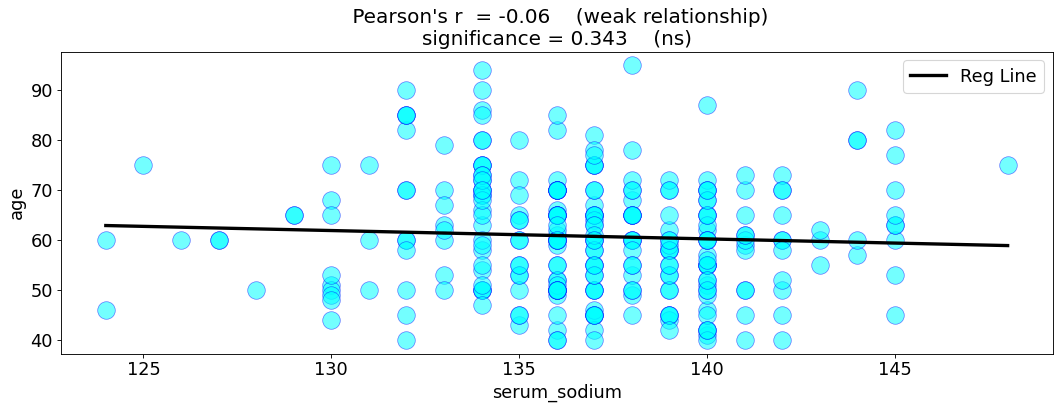

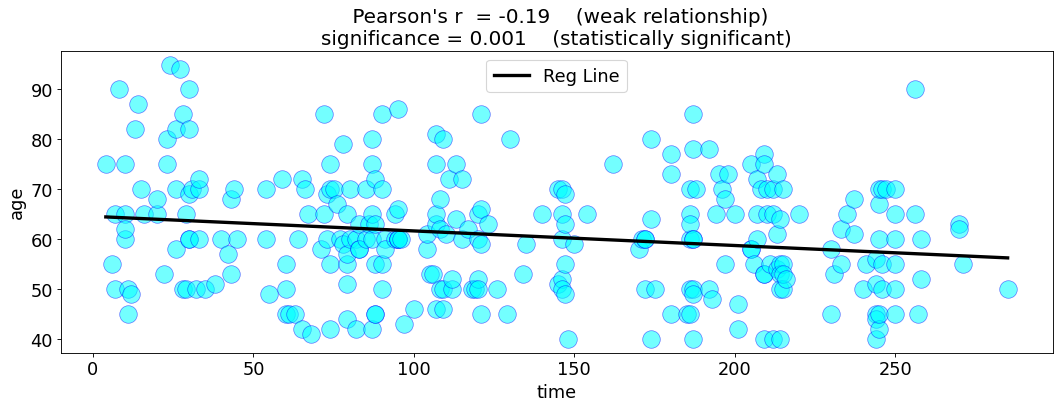

                    feature  Pearson_r       Sig
0                       age   1.000000  0.000000
6                      time   0.191331  0.001171
2          serum_creatinine   0.184725  0.001737
1                 platelets   0.101266  0.087927
4         ejection_fraction   0.084964  0.152534
3  creatinine_phosphokinase   0.072070  0.225164
5              serum_sodium   0.056397  0.342789


In [70]:
# Scatter-Plots with Regression-Line & Pearson's r results

R=[]     # empty list of Pearson's r  "r"
P=[]     # empty list of Pearson's r  "p"

for c in scalar_columns:
    
    x    = df_clean[ c ].copy()
    n    = len(x)
    sx   = sum(x); mx=np.mean(x); x2=x**2; sx2=sum(x2); 
    xreg = [ min(x), max(x) ];
    
    y = df_clean[ estimated_column ].copy() 
    sy=sum(y); my=np.mean(y); 
    
    xy=x*y; sxy=sum(xy);
    
    b = ( (n*sxy)-(sx*sy) ) / ( (n*sx2)-sx**2 )
    a = my - (b*mx)
    
    yreg = a + np.multiply(b,xreg)
    
    
    # Pearson's r Test  =>  R & P
    from scipy.stats import pearsonr
    r, p  = pearsonr(x,y) 
    R.append(r)
    P.append(p)
    if   abs(r) <  .01: rel='(no relationship)'
    elif abs(r) <  .25: rel='(weak relationship)'
    elif abs(r) <  .50: rel='(moderate relationship)'
    elif abs(r) <  .75: rel='(large relationship)'
    elif abs(r) <= .99: rel='(very large relationship)'
    else              : rel='(perfect relationship)'    
    if    p <= 0.05   : sig='(statistically significant)'
    else              : sig='(ns)'
    
    # Visualizing 
    fig = plt.figure(figsize=(16, 5), dpi= 80)    
    plt.scatter( x,y, s=250, c='cyan', edgecolors='blue', linewidths=0.6, alpha=0.55) 
    plt.plot(xreg, yreg, lw=3, c='k', ls='-', label='Reg Line' )  
    
    
    
    # Decorations 
    plt.title(  " Pearson's r  = " + np.str(round(r,2)) + '    ' + rel
              +"\nsignificance = " + np.str(round(p,3)) + '    ' + sig
              , fontsize=18 )
    plt.xlabel(        c        , fontsize=16 )
    plt.ylabel( estimated_column, fontsize=16 ) 
    plt.xticks( fontsize=16 )
    plt.yticks( fontsize=16 )
    plt.legend( fontsize=16 )   
    plt.show()

# Pearson_r dataframe   
C=[]
for i in range( 0,len(R) ):
    R[i] = abs(R[i])
    if   (P[i]>.05): C.append('red') 
    else           : C.append('cyan')

Pearson_r_Dict = { 'feature'   : scalar_columns
                 , 'Pearson_r' : R
                 , 'Sig'       : P
                 , 'Color'     : C }

Pearson_r = pd.DataFrame( Pearson_r_Dict )
Pearson_r = Pearson_r.sort_values(['Pearson_r','Sig'], ascending=[False,True])
print( Pearson_r.loc[:,['feature','Pearson_r','Sig']] )

#####   

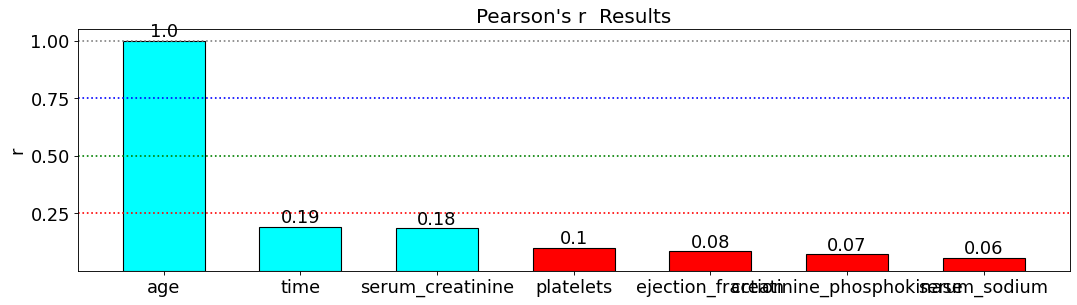

In [71]:
# Visualizing Pearson_r

def Bar_Plot( Pearson_r ):
    
    ft = Pearson_r[ 'feature'   ]
    r  = Pearson_r[ 'Pearson_r' ] 
    c  = Pearson_r[ 'Color'     ]
    
    fig = plt.figure( figsize=(16, 4), dpi= 80 )   
    
    plt.bar( ft, r, color=c, width=0.6, edgecolor='black' )
    for i, val in enumerate( r.values ):
            plt.text(  i, val, round(float(val),2)
                     , horizontalalignment='center', verticalalignment='bottom'
                     , fontdict={'fontweight':500, 'size':16}
                    ) 
    
    plt.title( "Pearson's r  Results", fontsize=18 )
    #plt.xlabel( "scalar features", fontsize=16 )
    plt.ylabel( "r"   , fontsize=16 )
    plt.xticks(fontsize=16)
    plt.yticks([.25,.50,.75,1.0],fontsize=16)  
    plt.axhline( y=0.25, color='red',   linewidth=1.5, linestyle=':', label='r = 0.25' )
    plt.axhline( y=0.50, color='green', linewidth=1.5, linestyle=':', label='r = 0.50' )
    plt.axhline( y=0.75, color='blue',  linewidth=1.5, linestyle=':', label='r = 0.75' )
    plt.axhline( y=1.00, color='gray',  linewidth=1.5, linestyle=':', label='r = 1.00' )

Bar_Plot( Pearson_r )    

In [72]:
# help
print( scalar_columns )

['age', 'platelets', 'serum_creatinine', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_sodium', 'time']


In [73]:
# features with  weak relationship  or  nonsignificant Pearson_r
weakly_related_cols = [ 'platelets', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_sodium' ] 

In [74]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
#                                                         #
#                    Downsampling Data                    #
#                                                         #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

In [75]:
# finding mean of prediction column
mid = df_clean[ estimated_column ].mean()
mid

60.733333333333334

In [76]:
# Using A Category to Downsample
df_High = df_clean[ df_clean[ estimated_column ]>=mid ]  # 465 record
df_Low  = df_clean[ df_clean[ estimated_column ]< mid ]  # 514 record
nHigh, nLow = len(df_High), len(df_Low) 
print( nHigh, nLow )

129 156


In [77]:
# down_sampling  (resize to 2000)
df_High_downsampled = resample( df_High, replace=False, n_samples=nHigh, random_state=0 )
df_Low_downsampled  = resample( df_Low,  replace=False, n_samples=nLow,  random_state=0 ) 

print(  len( df_High_downsampled )
      , len( df_Low_downsampled  ) 
     )

129 156


In [78]:
# merging down_sampled datasets
df_sample = pd.concat( [  df_High_downsampled
                        , df_Low_downsampled  ] )
len( df_sample )  # 920  

285

In [79]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
#                                                         #
#                   Formatting the Data                   #
#                                                         #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

In [80]:
# step 1:  defining x & y

x = df_sample.drop( estimated_column, axis=1 ).copy()
x = x.drop( weakly_related_cols , axis=1 )

y = df_sample[ estimated_column ].copy() 

In [81]:
# step 2: One-Hot Encoding of categorical data on x

encode_columns = []
for ft in categorical_columns:
    if ft not in  [estimated_column]:
        encode_columns.append(ft)
        
x_encoded = pd.get_dummies( x, columns=encode_columns )
x_encoded.head()

,serum_creatinine,time,anaemia_0,anaemia_1,diabetes_0,diabetes_1,high_blood_pressure_0,high_blood_pressure_1,sex_0,sex_1,smoking_0,smoking_1,DEATH_EVENT_0,DEATH_EVENT_1
83,1.8,78,0,1,1,0,0,1,0,1,1,0,1,0
42,1.2,33,1,0,0,1,0,1,0,1,0,1,0,1
238,1.0,210,0,1,0,1,1,0,1,0,1,0,1,0
110,1.2,90,1,0,1,0,1,0,0,1,0,1,0,1
18,1.0,15,0,1,1,0,0,1,1,0,1,0,0,1


In [82]:
# step 3: training and testing sets 

x_train, x_test, y_train, y_test = train_test_split(
      x_encoded, y
    , random_state = 0 
    ,test_size = (25/len(df_sample)) 
    )

In [83]:
# step 4: scaling x
x_train_scaled = scale( x_train )
x_test_scaled  = scale( x_test  ) 

In [84]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
#                                                         #
#                   defining Regressors                   #
#                                                         #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

In [85]:
# Linear Regressor
Linear_reg   = LinearRegression() 

# Non_Linear Regressors
Hubert_reg   = HuberRegressor()
RANSACR_reg  = RANSACRegressor() 
TheilSen_reg = TheilSenRegressor()

In [86]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
#                                                         #
#           fitting, finding rmse & Visualizing           #
#                                                         #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

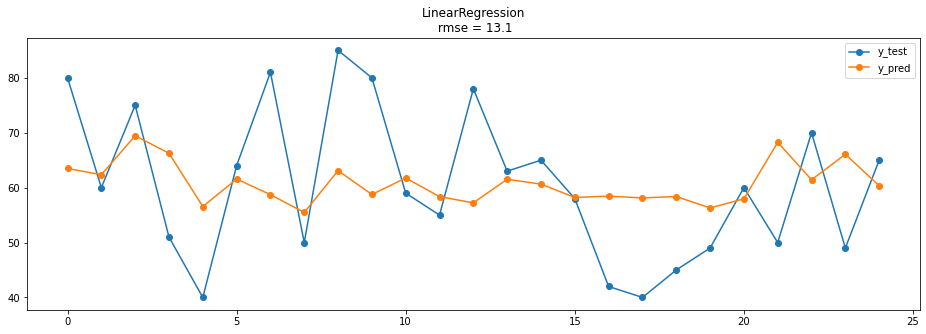

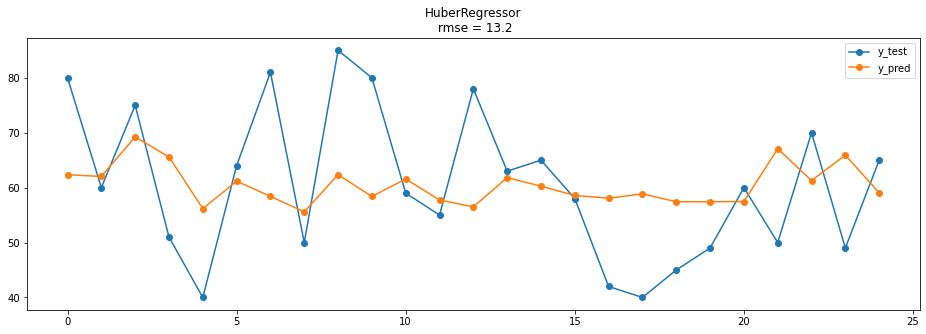

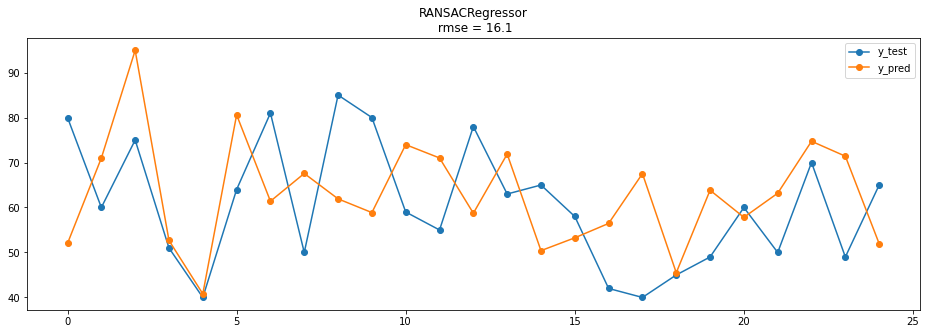

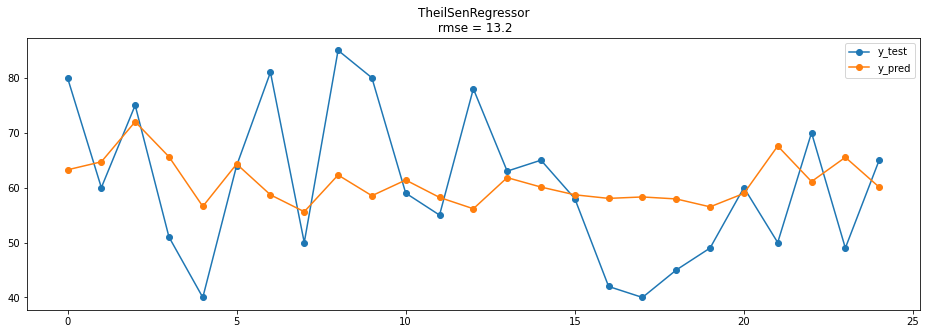


RMSE ...


,regressor,rmse
0,LinearRegression,13.12
1,HuberRegressor,13.25
2,RANSACRegressor,16.10
3,TheilSenRegressor,13.16


In [87]:
n=[]
a=[]

for reg in (  Linear_reg
            , Hubert_reg
            , RANSACR_reg
            , TheilSen_reg
            ):
    
    # fitting 
    reg.fit( x_train_scaled, y_train )
    
    # Finding RMSE
    y_pred = reg.predict( x_test_scaled ) 
    dSq = ( y_test - y_pred )**2
    rmse = ( sum(dSq)/len(dSq) )**0.5 
    n.append( reg.__class__.__name__ )
    a.append( rmse )  
    
    # Visualizing  by  Plotting y_test vs y_pred 
    x_ax = range( len(y_test) )
    fig, ax = plt.subplots(figsize=(16,5))     #figsize=(8,8)
    ax.plot( x_ax , y_test, ls='-', marker='o' ) 
    ax.plot( x_ax , y_pred, ls='-', marker='o' ) 
    ax.set_title( reg.__class__.__name__  + '\n rmse = ' +  np.str( np.round(rmse,1) ))
    ax.legend(['y_test','y_pred'])  
    #plt.ylim([-20,40])
    #plt.savefig(( np.str( np.round(rmse,3)) + '.png'), dpi=120) 
    plt.show()
    
# RMSE
print('\nRMSE ...')
RMSE=df_clean.iloc[:,[0,0]].head(4)
RMSE.iloc[:,0] = n
RMSE.iloc[:,1] = np.round(a,2)
RMSE.columns = ['regressor', 'rmse']
RMSE

In [88]:
# linear regressor "HuberRegressor" estimates the best

In [ ]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
#                                                         #
#               Preparing to make predictions             #
#                                                         #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

In [89]:
print('\n Acceptable Range ... \n')

# Range of scalar_columns
Range = pd.concat([df_clean[scalar_columns].min(),df_clean[scalar_columns].max()],axis=1)
Range.columns = ['Min','Max']
print( np.round( Range, 2 ), '\n' )

# Range of categorical_columns
for col in categorical_columns:
    items = sorted( df_clean[ col ].unique() )
    print( col, '   ', items )


 Acceptable Range ... 

                              Min       Max
age                          40.0      95.0
platelets                 25100.0  543000.0
serum_creatinine              0.5       4.4
creatinine_phosphokinase     23.0    2794.0
ejection_fraction            15.0      70.0
serum_sodium                124.0     148.0
time                          4.0     285.0 

anaemia     ['0', '1']
diabetes     ['0', '1']
high_blood_pressure     ['0', '1']
sex     ['0', '1']
smoking     ['0', '1']
DEATH_EVENT     ['0', '1']


#####   
## The Estimator
##### Input data. Note the range.

In [90]:
# predicted item
df_no_missing.loc[100,:]

age                             65
platelets                   298000
serum_creatinine               1.1
creatinine_phosphokinase       305
ejection_fraction               25
serum_sodium                   141
time                            87
anaemia                          1
diabetes                         0
high_blood_pressure              0
sex                              1
smoking                          0
DEATH_EVENT                      0
Name: 100, dtype: object

In [95]:
# input data                                   #  Range

#age                      = To Be Estimated    #  40.0     95.0
#platelets                = xxx  (small r)     #  25100.0  543000.0
serum_creatinine          = 1.1                #  0.5      4.4  
#creatinine_phosphokinase = xxx  (small r)     #  23.0     2794.0
#ejection_fraction        = xxx  (small r)     #  15.0     70.0
#serum_sodium             = xxx  (small r)     #  124.0    148.0
time                      = 87                 #  4.0     285.0 

anaemia                   = '1'                #  ['0', '1']
diabetes                  = '0'                #  ['0', '1']
high_blood_pressure       = '0'                #  ['0', '1']
sex                       = '1'                #  ['0', '1']
smoking                   = '0'                #  ['0', '1']
DEATH_EVENT               = '0'                #  ['0', '1']

#####   
## The Estimation
#####  ( auto )

In [96]:
# help
x.columns

Index(['serum_creatinine', 'time', 'anaemia', 'diabetes',
       'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT'],
      dtype='object')

In [97]:
# s  written in the same order as  x
s = [ serum_creatinine, time, anaemia, diabetes,
      high_blood_pressure, sex, smoking, DEATH_EVENT ]
# define a function called predicted_class
# which returns a string of the predicted class
def Estimator( s, x, encode_columns ):
    s  = pd.DataFrame( [s.copy(),s.copy()], columns=x.columns )
    sx = pd.concat( [s,x], axis=0 )
    sx_encoded = pd.get_dummies(
          sx
        , columns = encode_columns
        )
    sx_scaled = scale(  sx_encoded.iloc[1:,:]  )
    sx_scaled = sx_scaled[[0,1]]
    
    Estimation = Linear_reg.predict( sx_scaled )[0]
    #Estimation = Hubert_reg.predict( sx_scaled )[0] 
    #Estimation = RANSACR_reg.predict( sx_scaled )[0]
    #Estimation = TheilSen_reg.predict( sx_scaled )[0] 
    
    return Estimation    

pred = Estimator( s, x, encode_columns )
print('The', estimated_column, 'is', round(pred,1) ) 

The age is 60.5
